<div dir="rtl">
    
###

   - **יש למלא את המחברת באנגלית בלבד**
   - **מומלץ להשתמש בהמשך באותו הקובץ להגשת הפרויקט (מיחקו את התא הזה)**
   - **הקפידו למלא טקסט בשדות מסוג מארק-דאון וקוד בשדות מסוג קוד (אחרת ירדו לכם נקודות)**
     
###   המחברת תכלול  (לכל הפחות):
- שם הפרויקט
- שמות מלאים של כל חברי הצוות, ללא ת.ז
- תיאור הפרויקט (3-4 משפטים)
- קישור למקור ממנו הורדתם את הנתונים  
- הסבר על מקור הנתונים
- תיאור קצר של הדאטה בעזרת הפקודות שנלמדו בקורס ונעשה בהם שימוש בפרוירט
- שלוש שאלות ראשוניות של דברים שהיה מעניין אתכם להוציא מהקובץ
#### בהצלחה !
</div>

# Project Name: `Layoff Trends in the Global Tech Industry (2020–2024)`


### Project team members:
- `Miriam Dinay`
- `Roni Shapiro`

### Project number: <insert here>
`10`

### Project description:
`1-3 lines describing your project`

### Link to the data:
The dataset was downloaded from Kaggle:  
https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024

### Explain the data source:
`1-3 lines describing how this data was gathered, where from etc.`

----

#### Read you file from Github:

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/MiriamDinay/Layoff-Trends/main/tech_layoffs.csv'
Layoff_df=pd.read_csv(url)
Layoff_df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


#### Describe the data
* How many rows?
* How many columns?
* How many numeric columns? (not including numerical identifiers - numbers that uniquely define the row)
* How many categorical columns? (not including string identifiers -  values that uniquely define the row)

In [51]:
#How many rows?
#How many columns?

Layoff_df.shape

(1672, 16)

In [60]:
Layoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1672 non-null   int64  
 1   Company                      1672 non-null   object 
 2   Location_HQ                  1672 non-null   object 
 3   Country                      1672 non-null   object 
 4   Continent                    1672 non-null   object 
 5   Laid_Off                     1565 non-null   float64
 6   Date_layoffs                 1672 non-null   object 
 7   Percentage                   1570 non-null   float64
 8   Company_Size_before_Layoffs  1511 non-null   float64
 9   Company_Size_after_layoffs   1536 non-null   float64
 10  Industry                     1672 non-null   object 
 11  Stage                        1672 non-null   object 
 12  Money_Raised_in_$_mil        1596 non-null   object 
 13  Year              

In [86]:
# לשים לב לכתוב על מחיקת השורות שאנחנו לא צריכים למחקר. אחר כך נרשום הכל בצורה מסודרת
Layoff_df_copy = Layoff_df.copy()
Layoff_df_copy['Date_layoffs'] = pd.to_datetime(Layoff_df_copy['Date_layoffs'])
Layoff_df_copy['Money_Raised_in_$_mil'] = (Layoff_df_copy['Money_Raised_in_$_mil'].astype(str).str.replace(r'[$,]', '', regex=True))
Layoff_df_copy['Money_Raised_in_$_mil'] = pd.to_numeric(Layoff_df_copy['Money_Raised_in_$_mil'],errors='coerce')
Layoff_df_copy['#'] = Layoff_df_copy['#'].astype(str)
Layoff_df_copy = Layoff_df_copy.drop(columns=['lat', 'lng',])
Layoff_df_copy.dtypes

#                                      object
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
dtype: object

In [87]:
# בדיקה אם יש הבדלים בשנה והאם אפשר לסמוך על העמודה הזאת
mismatch = Layoff_df_copy[Layoff_df_copy['Date_layoffs'].dt.year != Layoff_df_copy['Year']]
mismatch.shape

(37, 14)

בבדיקת עקביות נוספת, נמצאו 37 רשומות שבהן שנת הפיטורין המדווחת לא תאמה את התאריך המלא. כדי להבטיח דיוק בניתוח הנתונים, החלטנו להתבסס אך ורק על עמודת ה-Date_layoffs ולעדכן את עמודת השנה לפיה.

In [91]:
# דריסת עמודת השנה המקורית בשנה המדויקת מהתאריך
Layoff_df_copy['Year'] = Layoff_df_copy['Date_layoffs'].dt.year

In [73]:
Layoff_df_copy.isnull().sum().sort_values(ascending=False)

Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Laid_Off                       107
Percentage                     102
Money_Raised_in_$_mil           76
#                                0
Continent                        0
Country                          0
Location_HQ                      0
Company                          0
Date_layoffs                     0
Industry                         0
Stage                            0
Year                             0
dtype: int64

בחרתי לבצע המרת טיפוסי נתונים לפני ניקוי שורות כדי לשמר את שלמות בסיס הנתונים המקורי. ערכים חסרים לא הושלמו באופן מלאכותי כדי למנוע הטיה בניתוח חומרת הפיטורין וגודל החברות

In [74]:
# 4. ניקוי שורות שאין בהן מידע על פיטורין בכלל (כמות או אחוז)
# זהו השלב שבו אנחנו מוודאים שכל שורה ב-Dataset יכולה לתרום למחקר
Layoff_df_copy = Layoff_df_copy.dropna(subset=['Laid_Off', 'Percentage'], how='all')

# 5. בקרת איכות (Sanity Check) - השוואת הפרשי גדלים לכמות המפוטרים
# הבדיקה מתבצעת רק היכן שכל שלושת הנתונים קיימים במקור
mask = (
    Layoff_df_copy['Company_Size_before_Layoffs'].notna() &
    Layoff_df_copy['Company_Size_after_layoffs'].notna() &
    Layoff_df_copy['Laid_Off'].notna()
)

Layoff_df_copy.loc[mask, 'size_diff_check'] = (
    Layoff_df_copy['Company_Size_before_Layoffs'] -
    Layoff_df_copy['Company_Size_after_layoffs'] -
    Layoff_df_copy['Laid_Off']
)

# הצגת סיכום הנתונים לאחר הניקוי
print(f"Total rows after cleaning: {len(Layoff_df_copy)}")
print(Layoff_df_copy.dtypes)

Total rows after cleaning: 1624
#                                      object
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
size_diff_check                       float64
dtype: object


In [75]:
inconsistent_rows = Layoff_df_copy[Layoff_df_copy['size_diff_check'] != 0].shape[0]
print(f"Number of rows with inconsistencies: {inconsistent_rows}")

Number of rows with inconsistencies: 114


הפער שנמצא ב-114 רשומות מדגיש ששינויים במצבת כוח האדם מושפעים מגורמים נוספים מלבד פיטורים מוכרזים, כגון עזיבה מרצון או שינויים ארגוניים פנימיים. לכן, שמירה על הנתונים המקוריים מבטיחה ניתוח אובייקטיבי יותר

In [76]:
(Layoff_df_copy.loc[mask, 'size_diff_check'] == 0).mean()

np.float64(0.99933818663137)

כדי להעריך את איכות הנתונים, ביצענו בדיקת הצלבה (Sanity Check) על תת-קבוצה של רשומות המכילות נתונים מלאים לגבי גודל החברה (לפני ואחרי) ומספר המפוטרים.

ממצאי הבדיקה:

מתוך השורות שנבדקו (ה-mask), נמצא כי ב-114 רשומות קיים פער מתמטי.

פער זה אינו מעיד על חוסר אמינות של ה-Dataset, אלא על כך שהשינוי במצבת כוח האדם מושפע מגורמים נוספים כמו עזיבה מרצון או גיוס במקביל.

בדיקה זו חיזקה את ההחלטה המתודולוגית לא לבצע השלמת נתונים (Imputation) בצורה אוטומטית, אלא לעבוד עם הנתונים המקוריים בלבד כדי לשמור על אובייקטיביות הניתוח

##### יצרנו העתק של קובץ הנתונים המקורי, סידרנו אותם וסיווגנו את "טיפוסי" העמודות.
##### מעתה, בהמשך העבודה נעבוד על קובץ ההעתק בלבד.

In [78]:
Layoff_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 1671
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1624 non-null   object        
 1   Company                      1624 non-null   object        
 2   Location_HQ                  1624 non-null   object        
 3   Country                      1624 non-null   object        
 4   Continent                    1624 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1624 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1624 non-null   object        
 11  Stage                        1624 non-null   obj

In [80]:
#האם כדאי להשאיר או למחוק את עמודות הקורדינטות והסולמית.
# Layoff_df_copy.describe()

In [112]:
# How many numeric columns?
numeric_cols = Layoff_df_copy.select_dtypes(include=['int64', 'float64']).columns

print(f"Number of numerical columns: {len(numeric_cols)}")
print(f"The columns are: {list(numeric_cols)}")

Number of numerical columns: 5
The columns are: ['Laid_Off', 'Percentage', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Money_Raised_in_$_mil']


In [110]:
# How many categorical columns?
categorical_cols = Layoff_df_copy.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['Company', '#']) #האם להוריד או להשאיר?

print(f"Number of meaningful categorical columns: {len(categorical_cols)}")
print(f"The columns are: {list(categorical_cols)}")

Number of meaningful categorical columns: 5
The columns are: ['Location_HQ', 'Country', 'Continent', 'Industry', 'Stage']


Categorical columns were identified based on object data types, while string identifiers such as the company name were excluded from the analysis.

הוספה שלנו!!!!!!

Data Overview

The dataset contains **1,672 rows** and **16 columns**, each representing a layoff event in the global tech industry between 2020 and 2024.

After data cleaning and filtering, the working dataset includes **1,624 observations**.

Numeric variables include the number of employees laid off, layoff percentage, company size before and after layoffs, and total funding raised.  
Categorical variables include company location, country, continent, industry, and company stage.

Identifier columns and textual identifiers (such as company names) were excluded from numerical and categorical analyses.

#### Write three questions you would like to answer using this data

1. `How do layoff patterns vary over time, and are there noticeable peaks during specific periods between 2020 and 2024?`

2. `How does company stage influence the frequency and severity of layoffs in the tech industry?`

    How does company stage (e.g., early-stage, post-IPO, acquired) influence the frequency and severity of layoffs in the tech industry?

3. `Do smaller companies experience more severe layoffs relative to their size compared to larger companies?`

   Do smaller companies experience more severe layoffs relative to their workforce size compared to larger companies?

In [165]:
# 1. יצירת עמודת הרבעון המקורית (כדי לשמור על הסדר הכרונולוגי)
Layoff_df_copy['Quarter_Period'] = Layoff_df_copy['Date_layoffs'].dt.to_period('Q')

# 2. יצירת סיכום רבעוני
qtr_summary = (
    Layoff_df_copy
    .loc[Layoff_df_copy['Date_layoffs'].dt.year.between(2020, 2024)]
    .groupby('Quarter_Period')
    .agg(
        Total_Laid_Off=('Laid_Off', 'sum'),
        Layoff_Events=('#', 'count')
    )
    .reset_index()
)

# 3. שינוי הנראות מ-2020Q1 ל-2020 Q1 (הוספת רווח לפני ה-Q)
# אנחנו הופכים את זה לטקסט ומשתמשים ב-replace כדי להוסיף רווח
qtr_summary['Quarter_Period'] = qtr_summary['Quarter_Period'].astype(str).str.replace('Q', ' Q')

qtr_summary.head()


,Quarter_Period,Total_Laid_Off,Layoff_Events
0,2020 Q1,7441.0,61
1,2020 Q2,49710.0,245
2,2020 Q3,4390.0,21
3,2020 Q4,419.0,6
4,2021 Q1,848.0,6


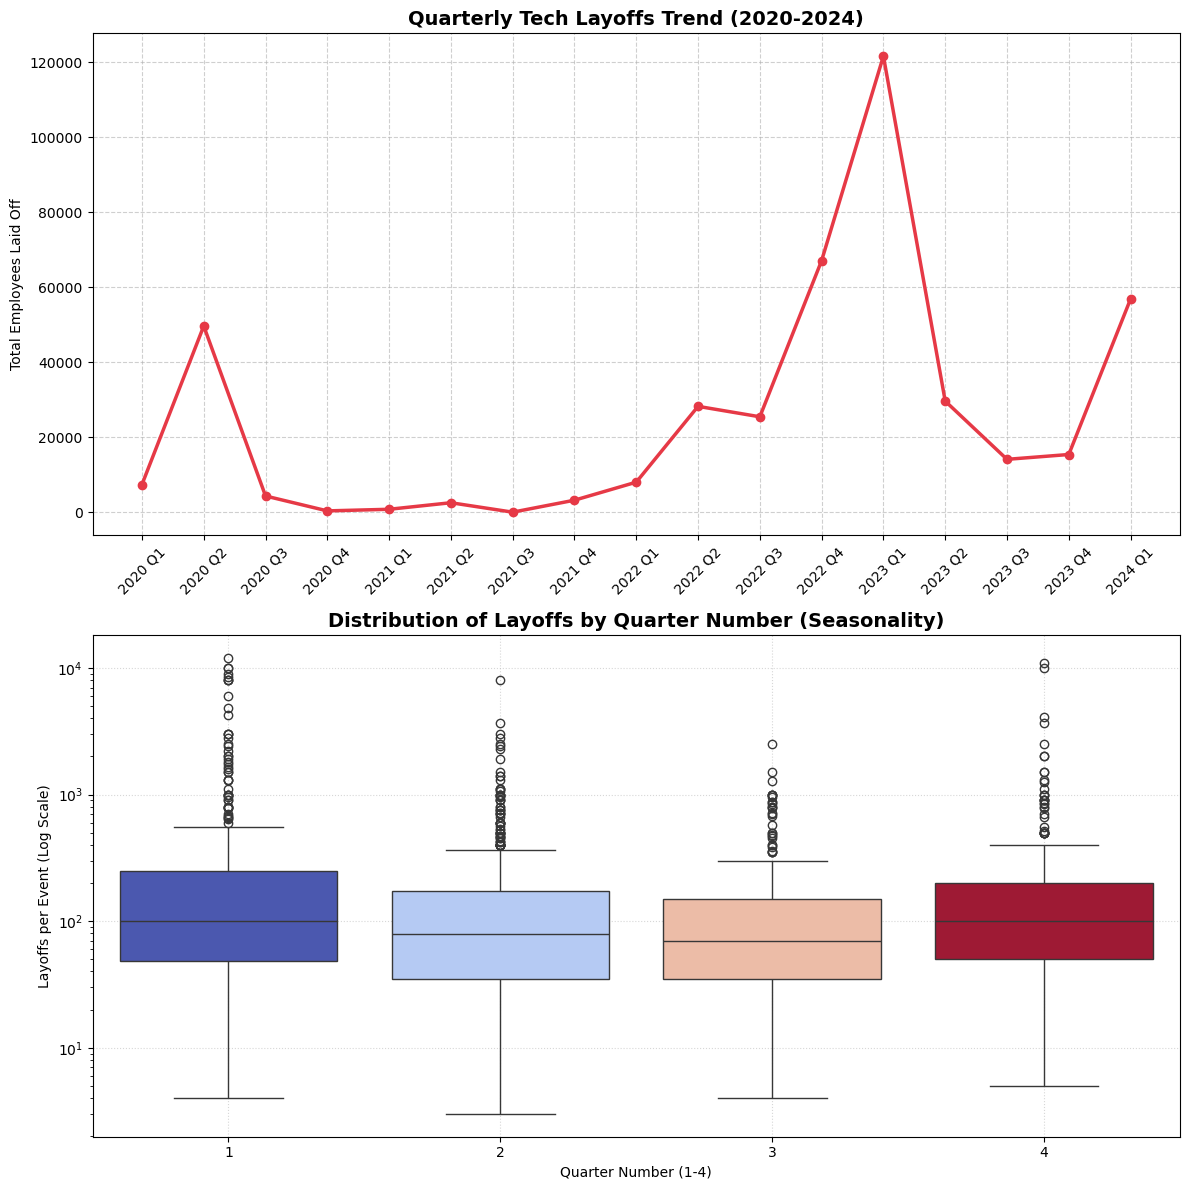


--- The 3 Most Volatile Quarters Found ---


,Quarter_Period,Total_Laid_Off
0,2023 Q1,121667.0
1,2022 Q4,67152.0
2,2024 Q1,56918.0


In [168]:
# --- Question 1: Visualizations (Quarterly Trends) ---

# 1. הכנת נתוני ה-Boxplot (צריך את הנתונים הגולמיים, לא המסוכמים)
df_q1 = Layoff_df_copy.dropna(subset=['Date_layoffs', 'Laid_Off']).copy()
df_q1['Quarter_Num'] = df_q1['Date_layoffs'].dt.quarter

# הגדרת אזור תצוגה עם שני גרפים
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 2. גרף קווי - מגמה רבעונית (Trend Analysis)
# כאן אנחנו משתמשים ב-qtr_summary שיצרת בתא הקודם!
ax1.plot(qtr_summary['Quarter_Period'], qtr_summary['Total_Laid_Off'], 
         marker='o', linestyle='-', color='#e63946', linewidth=2.5)

ax1.set_title('Quarterly Tech Layoffs Trend (2020-2024)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Employees Laid Off')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

# 3. Boxplot - בדיקת עונתיות (Seasonality)
sns.boxplot(data=df_q1, x='Quarter_Num', y='Laid_Off', hue='Quarter_Num', ax=ax2, palette='coolwarm', legend=False)
ax2.set_title('Distribution of Layoffs by Quarter Number (Seasonality)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Quarter Number (1-4)')
ax2.set_ylabel('Layoffs per Event (Log Scale)')
ax2.set_yscale('log')
ax2.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. חילוץ והצגת ה-Peaks מתוך ה-qtr_summary שלך
top_q_peaks = qtr_summary.sort_values(by='Total_Laid_Off', ascending=False).head(3)
print("\n--- The 3 Most Volatile Quarters Found ---")
display(top_q_peaks[['Quarter_Period', 'Total_Laid_Off']].reset_index(drop=True))

בסביבות ינואר 2023 בדרך כלל רואים את השיא הגדול ביותר (משבר האינפלציה העולמי).

בסביבות מרץ-אפריל 2020 רואים את הפיק של תחילת הקורונה.

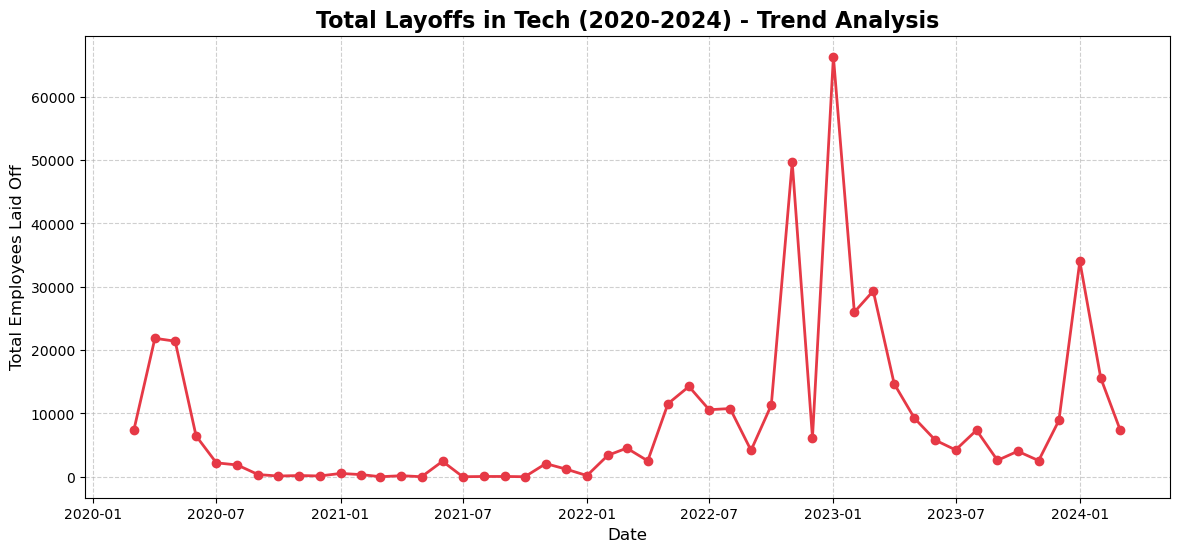

Noticeable Peaks Found:


,Month,Total_Laid_Off
0,2023-01-01,66329.0
1,2022-11-01,49656.0
2,2024-01-01,34007.0


In [177]:
###הגרף כאן לפי חודשים, הוא מצוין רק צריך לפי רבוענים. זה ללא בוקס 


# 3. יצירת הגרף (כפי שהצעת - הכי נכון ויזואלית)
plt.figure(figsize=(14, 6))
plt.plot(monthly_layoffs.index, monthly_layoffs.values, marker='o', linestyle='-', color='#e63946', linewidth=2)

plt.title('Total Layoffs in Tech (2020-2024) - Trend Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Employees Laid Off', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. חילוץ ה-Peaks והצגתם כטבלה מסודרת
top_peaks_df = monthly_layoffs.sort_values(ascending=False).head(3).reset_index()
top_peaks_df.columns = ['Month', 'Total_Laid_Off']

print("Noticeable Peaks Found:")
top_peaks_df

<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
  <span style="color: red;"><strong>— Do not proceed beyond this point. This is for the next steps, do not fill in —</strong></span>
</div>


---
### <span style="color:green"> Observation 1:</span>
How do layoff patterns vary over time, and are there noticeable peaks during specific periods between 2020 and 2024?
>
>
>
>


---

---
### <span style="color:green"> Observation 2:</span>

>
>
>
>


---

---
### <span style="color:green"> Observation 3:</span>

>
>
>
>


---

---
### <span style="color:green"> Summary</span>

> Anything you'd like to say - your conclusions, summary, how hard you worked etc.
>
>    
>   
   

---